In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hdbscan
from sklearn.manifold import TSNE

### 데이터 살펴보기
- algo_df: 5개 알고 polar 카테별 점수 + 소분류 태그별 점수
- nlp_df: 자연어처리를 통해 클러스터링한 label데이터

In [3]:
path = "../../datas/"
algo_df = pd.read_csv(path+"tag_prior_0718.csv")
algo_df = algo_df.loc[:,~algo_df.columns.str.match("Unnamed")]
nlp_df = pd.read_csv(path+"camp_description.csv")[['facltNm', 'labels']]
len(algo_df), len(nlp_df)

(2611, 1410)

In [4]:
algo_df.head()

,camp,contentId,friendly_s,exciting_s,relax_s,spacious_s,clean_s,hot_water_s,parking_s,with_child_s,...,view_r,parking_r,exciting_r,clean_r,conv_facility_r,comfort,together,fun,healing,clean
0,좋은 카라반,7934,0,0,0,0,0,0,0,0,...,0.000000,0.0,0.0,0.000000,0.0,9.3,1.1,1.2,0.0,0.0
1,성주선바위캠핑장,7935,0,0,0,0,0,0,0,0,...,0.781176,0.0,0.0,0.797778,0.0,31.0,62.1,31.5,61.4,75.4
2,이화만리캠핑장,7936,0,0,0,0,0,0,0,0,...,0.000000,0.0,0.0,0.000000,0.0,9.3,1.1,1.2,0.0,0.0
3,하비오토캠핑장,7939,0,0,0,0,0,0,0,0,...,0.000000,0.0,0.0,0.000000,0.0,15.9,13.2,3.5,22.7,0.0
4,수림 휴원,7940,0,0,0,0,0,0,0,0,...,0.000000,0.0,0.0,0.000000,0.0,9.3,1.1,1.2,0.0,0.0


In [5]:
nlp_df.drop_duplicates('facltNm', keep=False, inplace=True)
nlp_df.head()

,facltNm,labels
0,몽골캠핑장,14
1,고운마을캠핑장,-1
2,솔미캠핑장,10
3,강나루야영장,10
4,스카이랜드리조트,10


In [6]:
merge_df = pd.merge(algo_df, nlp_df, how="left", left_on="camp", right_on="facltNm")
merge_df.drop('facltNm', axis=1,inplace=True)
merge_df["labels"] = [str(int(r)) if np.isnan(r) == False else r for r in merge_df["labels"]]
merge_df = pd.get_dummies(merge_df, columns=['labels'], dummy_na=True)
merge_df.head()

,camp,contentId,friendly_s,exciting_s,relax_s,spacious_s,clean_s,hot_water_s,parking_s,with_child_s,...,labels_15,labels_2,labels_3,labels_4,labels_5,labels_6,labels_7,labels_8,labels_9,labels_nan
0,좋은 카라반,7934,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,성주선바위캠핑장,7935,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,이화만리캠핑장,7936,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,하비오토캠핑장,7939,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,수림 휴원,7940,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
# 중복값 확인했으나 수가 적거나 영향이 작다고 판단, 우선 군집 진행
merge_df[merge_df[['camp']].duplicated()==True].sort_values("camp")['camp'].unique()

array(['느티나무 캠핑장', '늘푸른캠핑장', '두리캠핑장', '둥지캠핑장', '백운계곡캠핑장', '별빛야영장',
       '별헤는 밤', '산여울캠핑장', '소풍캠핑장', '솔바람 캠핑장', '솔밭야영장', '솔밭캠핑장', '포시즌',
       '포시즌 캠핑장'], dtype=object)

### 클러스터링

In [8]:
import camp_clustering as cc
ccl = cc.CampCluster()

In [8]:
# df = ccl.preprocessing()
# tsne_df = ccl.tsne_dm_reduction()

Cluster labels: 6 개
original data length: 2611 / clustering data length: 2611
cluster
0    380
1    252
2    360
3    468
4    455
5    696
Name: contentId, dtype: int64
Condensed tree plot


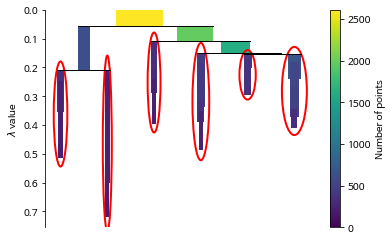

,camp,contentId,friendly_s,exciting_s,relax_s,spacious_s,clean_s,hot_water_s,parking_s,with_child_s,...,clean_r,conv_facility_r,comfort,together,fun,healing,clean,cluster,x,y
0,좋은 카라반,7934,0,0,0,0,0,0,0,0,...,0.000000,0.0,9.3,1.1,1.2,0.0,0.0,5,-45.631001,-16.464045
1,성주선바위캠핑장,7935,0,0,0,0,0,0,0,0,...,0.797778,0.0,31.0,62.1,31.5,61.4,75.4,1,45.993614,-21.088043
2,이화만리캠핑장,7936,0,0,0,0,0,0,0,0,...,0.000000,0.0,9.3,1.1,1.2,0.0,0.0,5,-48.682732,-19.145258
3,하비오토캠핑장,7939,0,0,0,0,0,0,0,0,...,0.000000,0.0,15.9,13.2,3.5,22.7,0.0,2,15.827852,-16.229319
4,수림 휴원,7940,0,0,0,0,0,0,0,0,...,0.000000,0.0,9.3,1.1,1.2,0.0,0.0,5,-50.105518,-16.017378


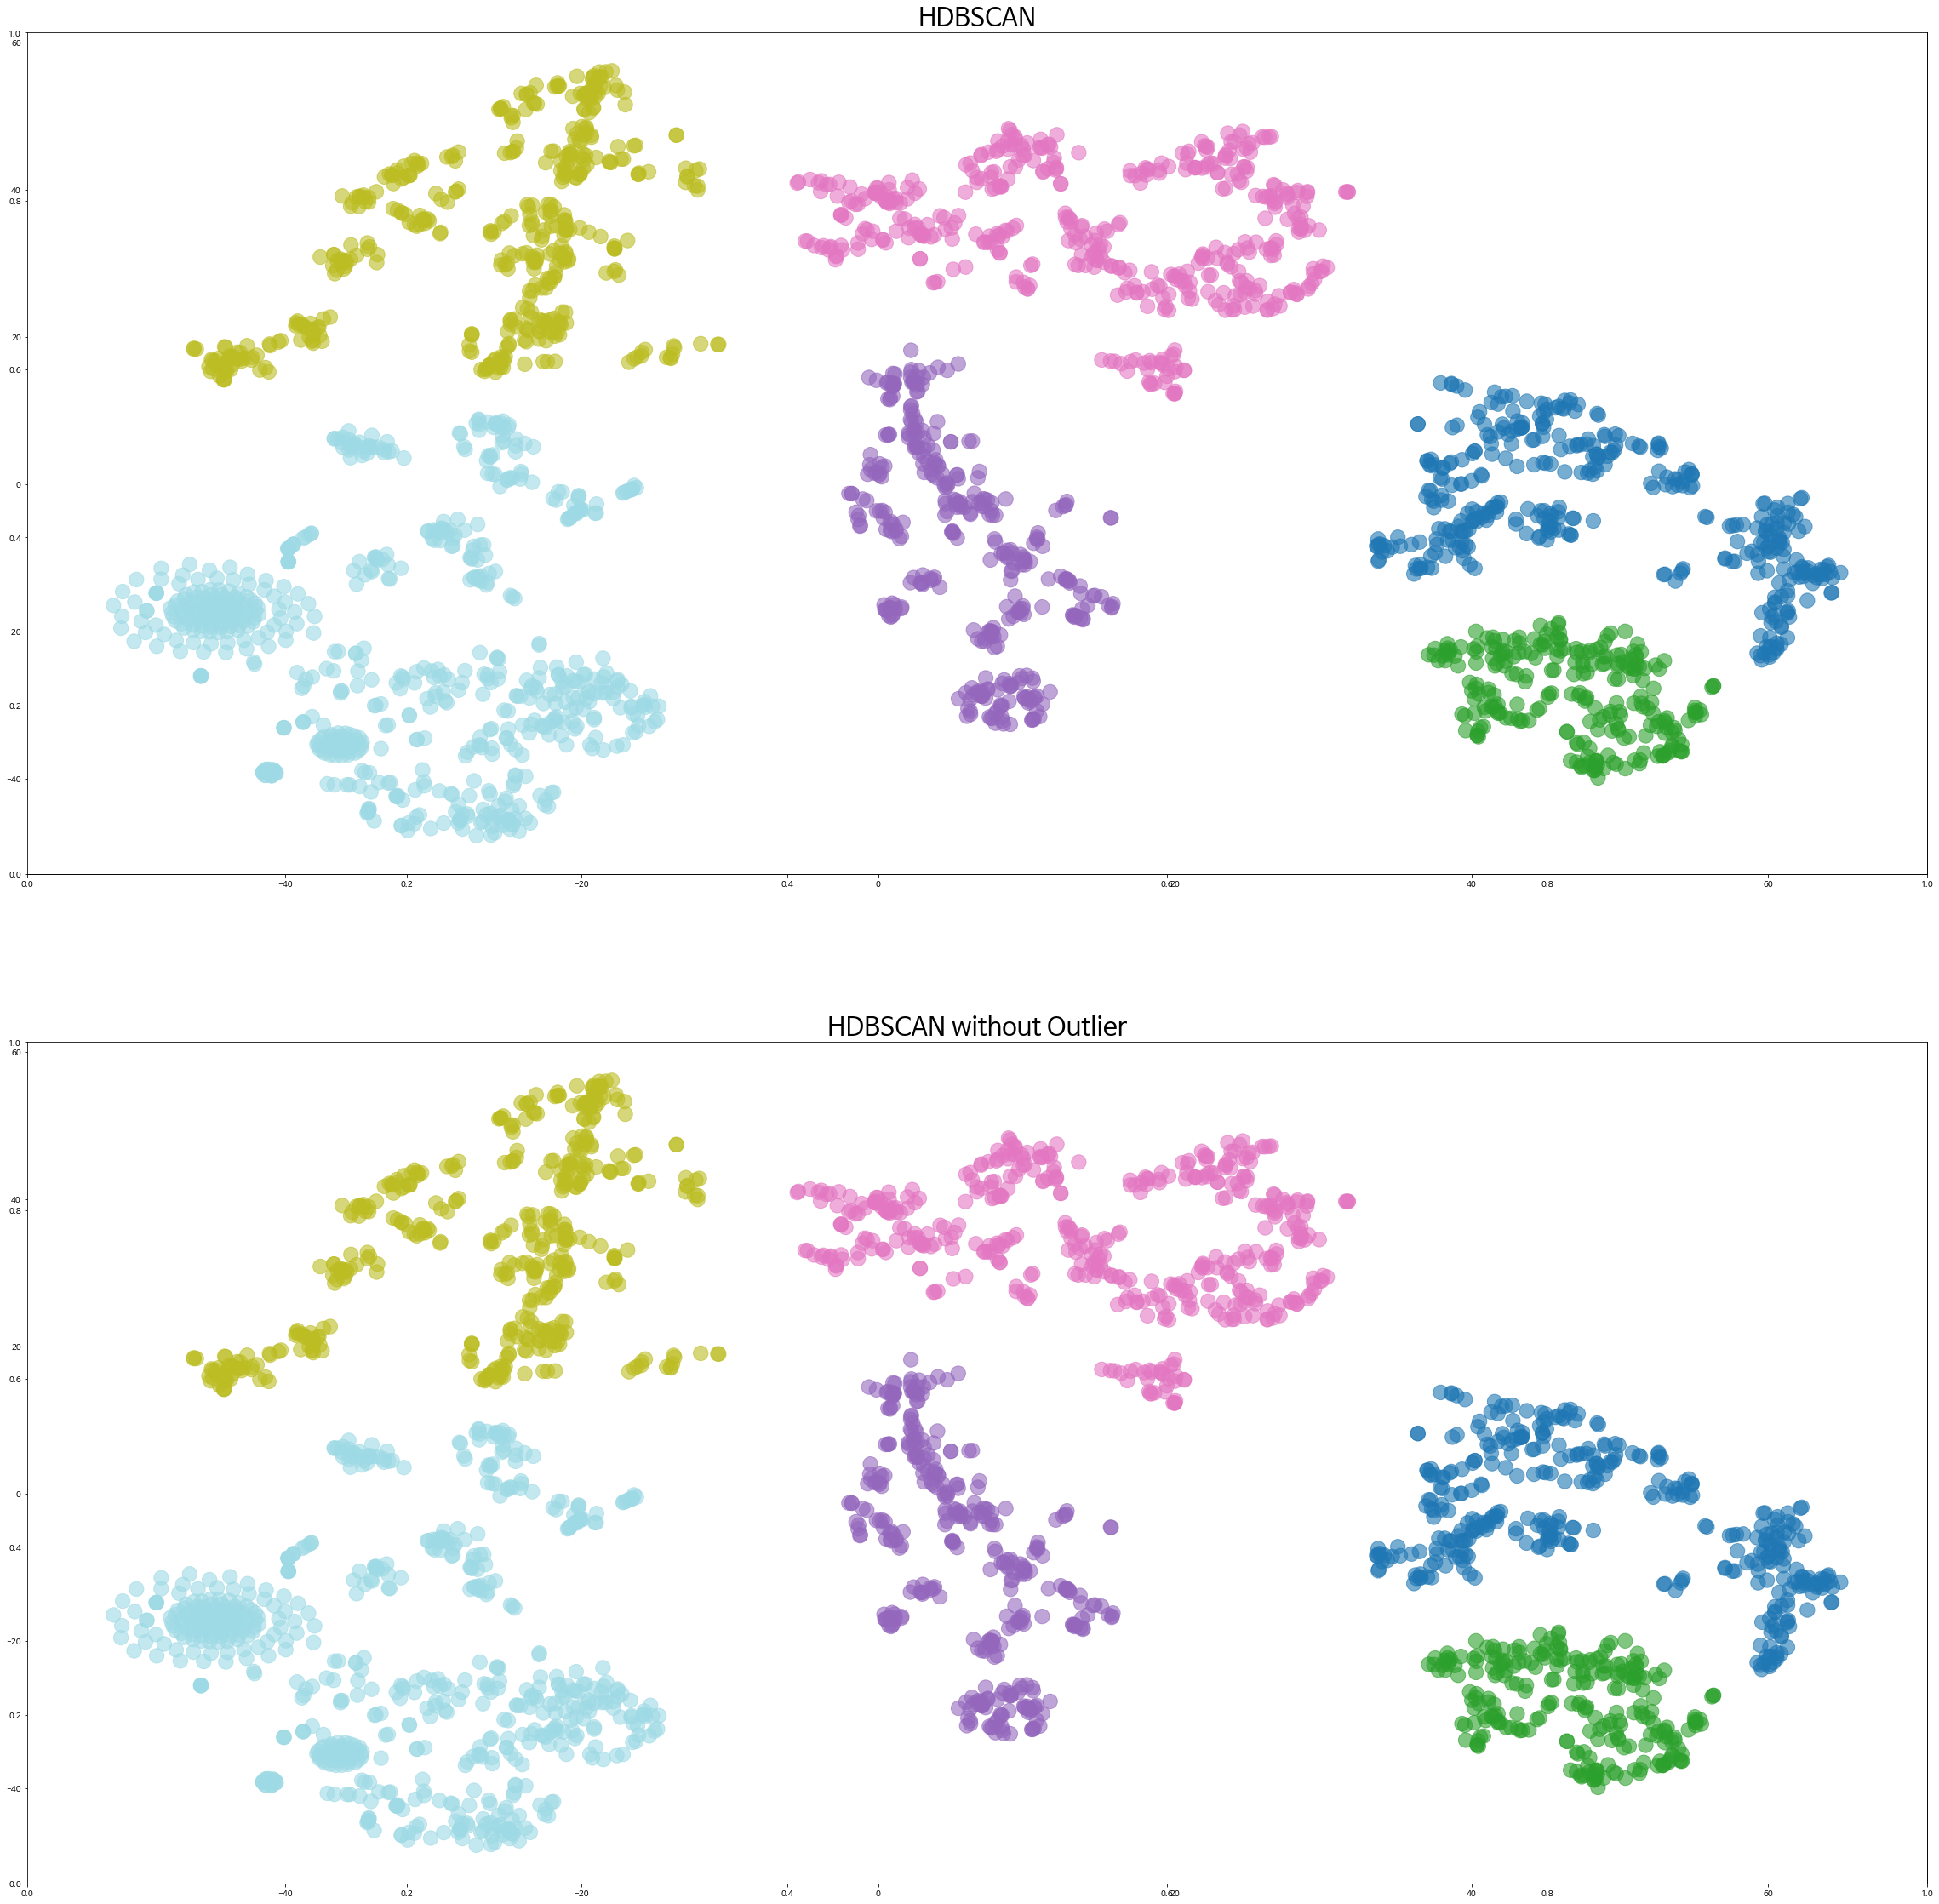

In [9]:
df = ccl.hdbscan_clustering(min_cluster_size=200, tsne=True)
df.head()

Dataframe Describe
         comfort   together        fun    healing      clean           x
count   5.000000   5.000000   5.000000   5.000000   5.000000    5.000000
mean   16.581852  24.758502  19.325723  21.388085  16.767889  446.200000
std     9.404094  27.022275  14.433630  27.203004  30.840945  164.390389
min     9.692816   2.012644   1.853736   0.289943   0.000000  252.000000
25%    10.405055   7.863611  13.968611   2.951868   3.185278  360.000000
50%    10.439167   8.495165  17.490549  15.562778   3.842094  455.000000
75%    21.394444  40.650855  21.864530  20.485043   4.973187  468.000000
max    30.977778  64.770238  41.451190  67.650794  71.838889  696.000000


,comfort,together,fun,healing,clean,x
cluster,,,,,,
0,27.581579,51.488684,21.173421,41.234474,71.043684,380
1,30.977778,64.770238,41.451190,67.650794,71.838889,252
2,10.439167,7.863611,13.968611,15.562778,3.185278,360
3,21.394444,40.650855,21.864530,20.485043,3.842094,468
4,10.405055,8.495165,17.490549,2.951868,4.973187,455
5,9.692816,2.012644,1.853736,0.289943,0.000000,696


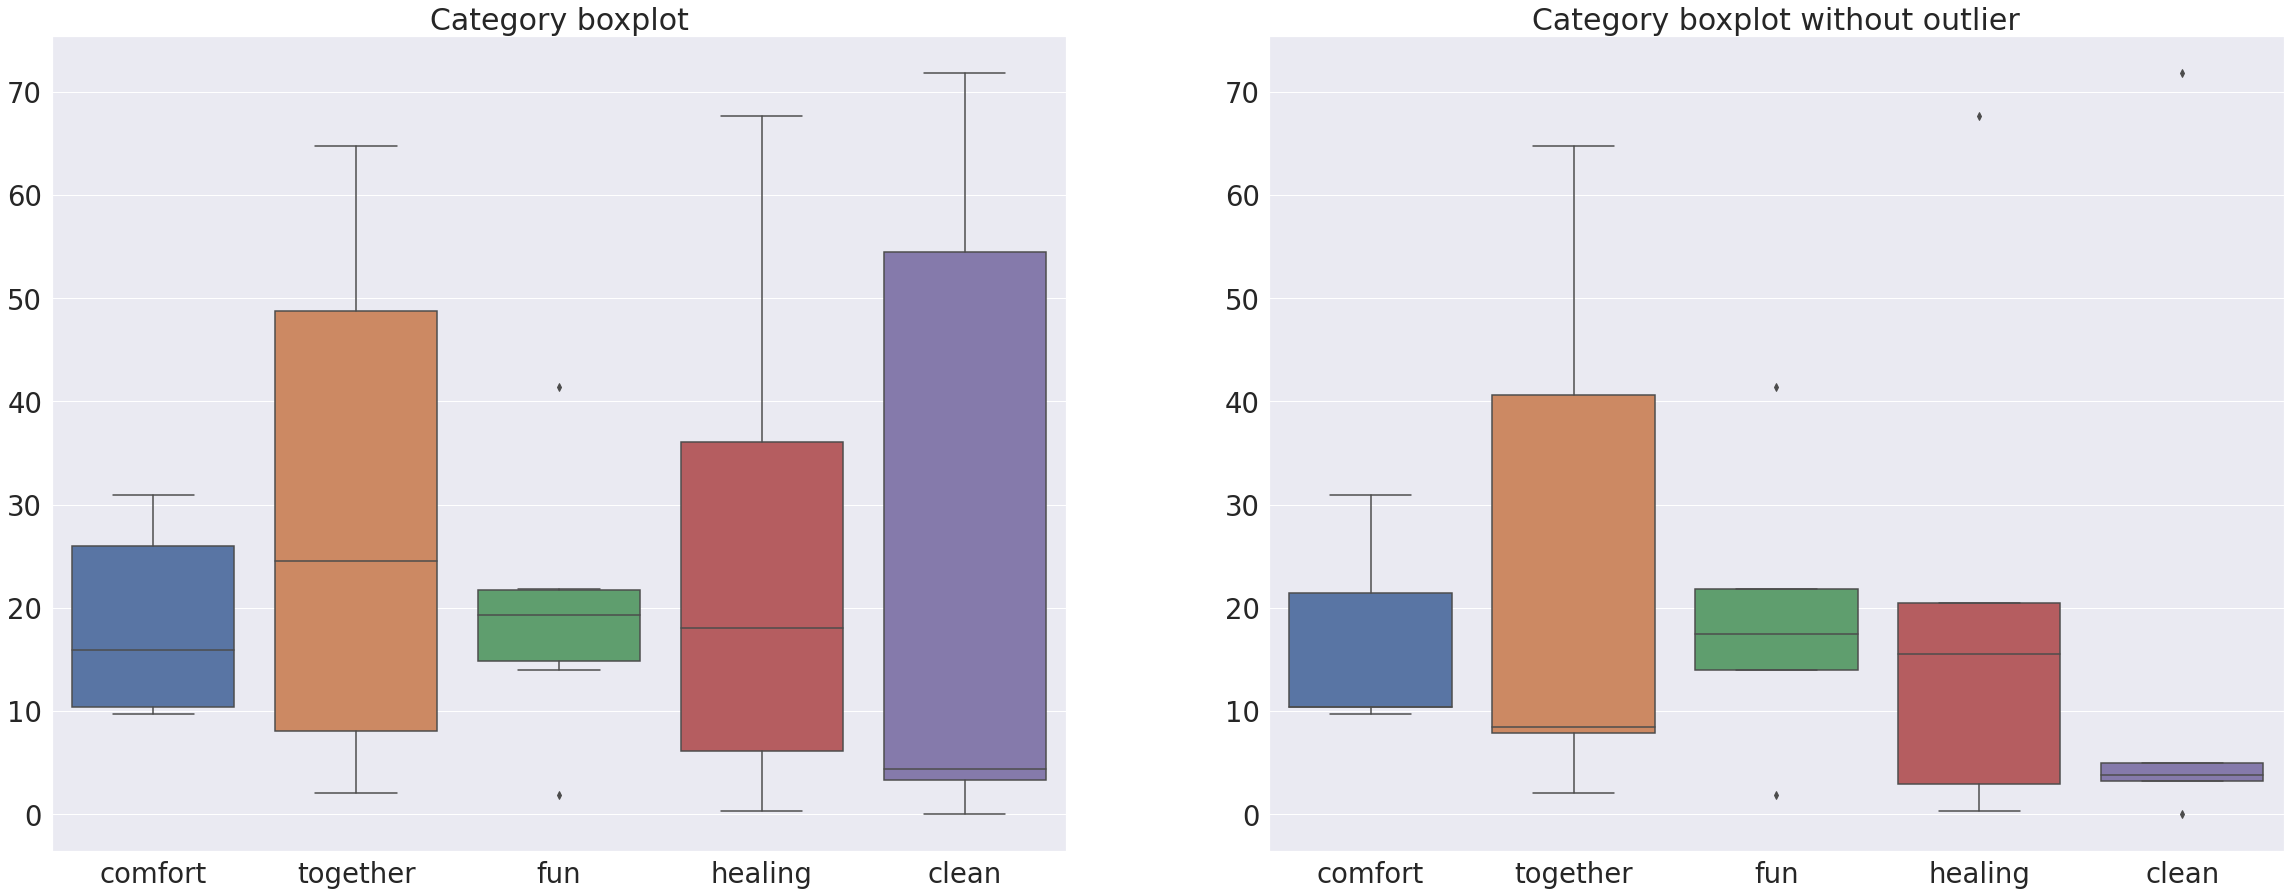

In [11]:
pv = ccl.cluster_eda(df)
pv

### cluster 별 특성 탐색

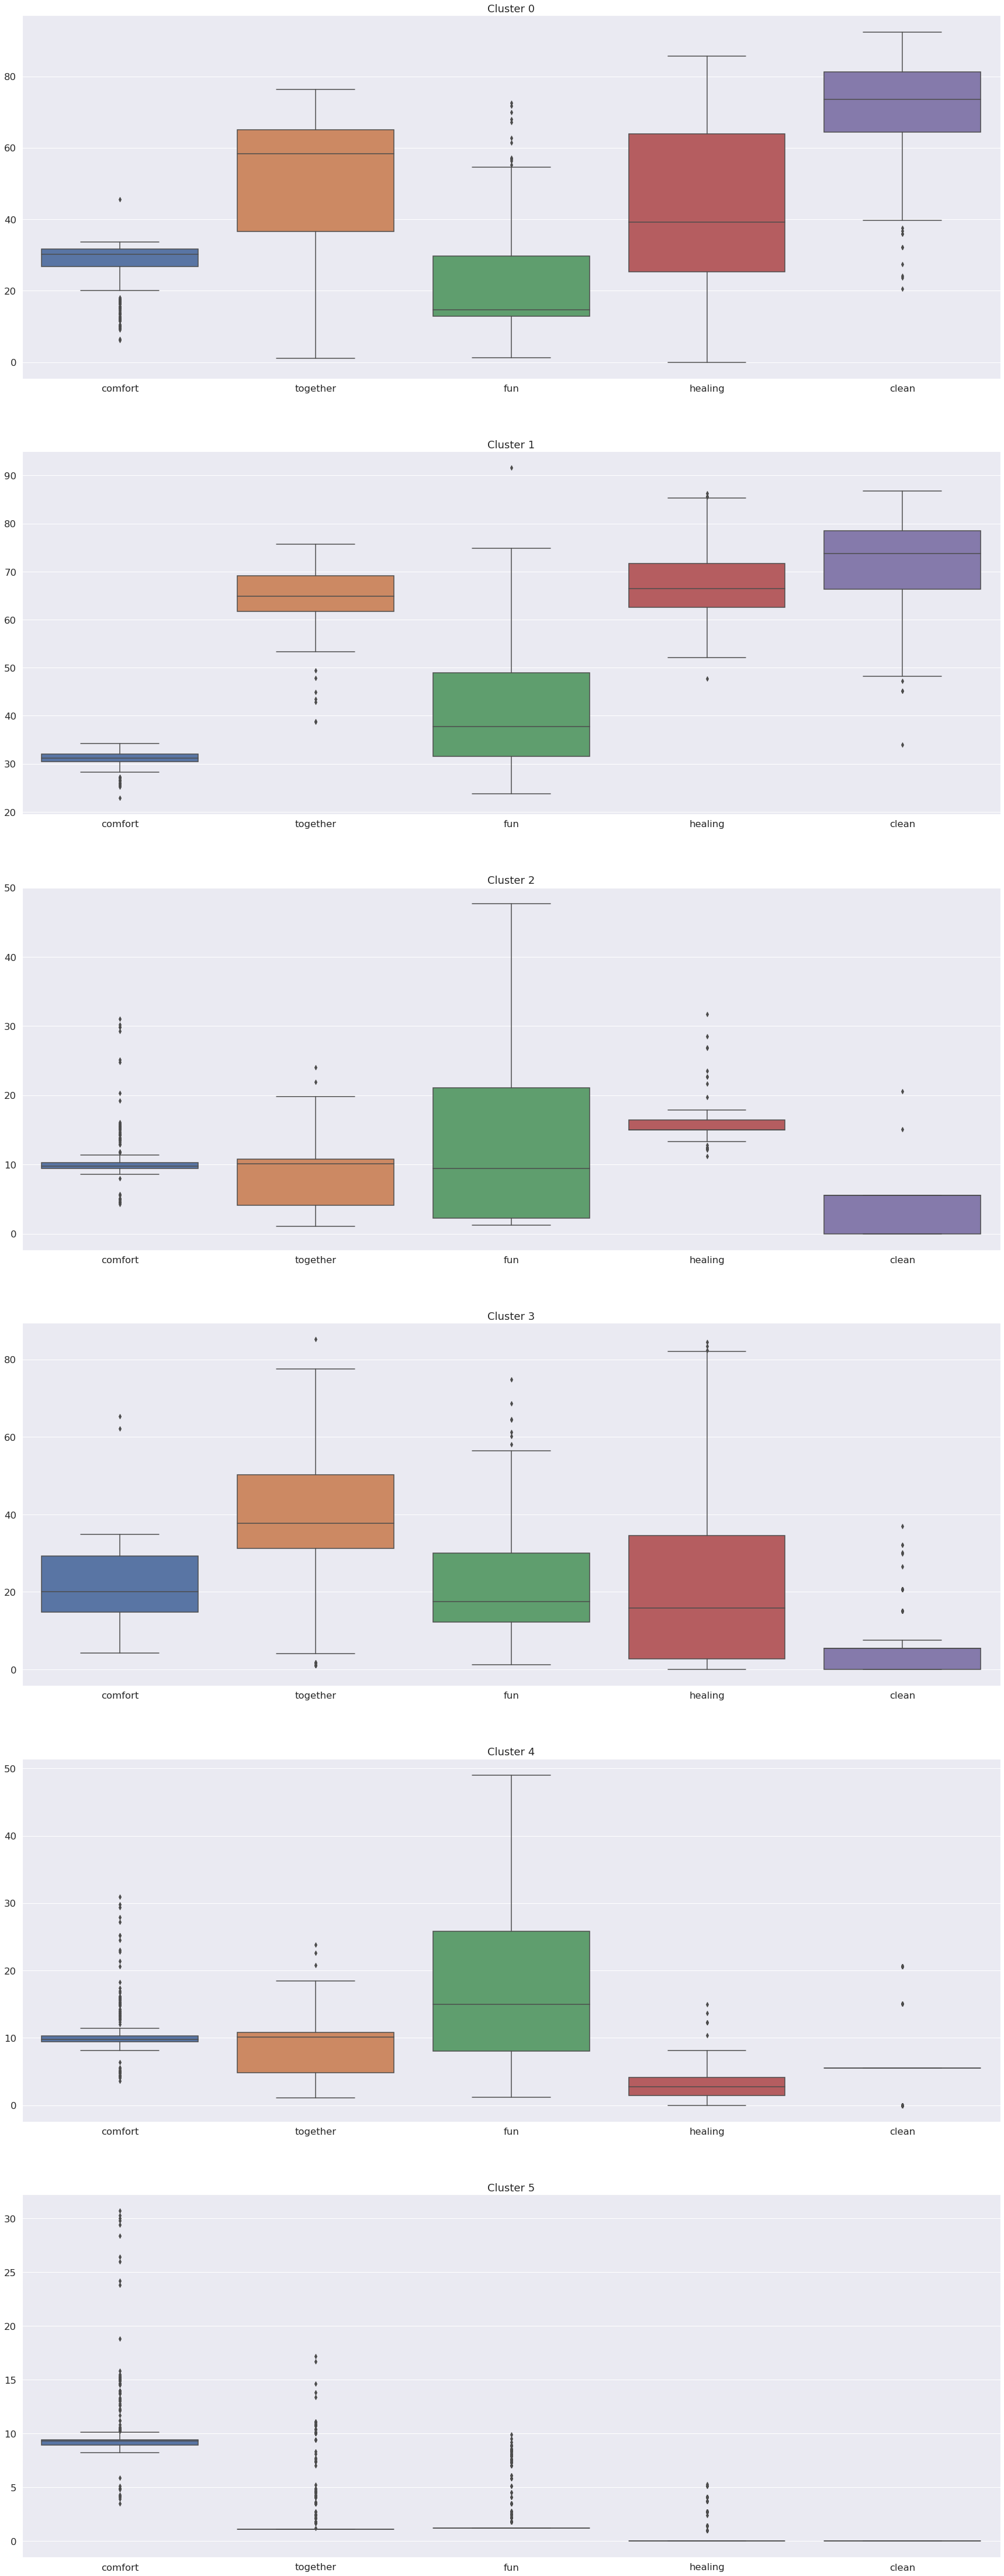

In [12]:
df1 = df[['cluster', 'comfort', 'together', 'fun', 'healing', 'clean']].copy()
df1.set_index('cluster', drop=True, inplace=True)

sns.set(font_scale=1.5)
c_ls = np.unique(df1.index).tolist()
fig, ax = plt.subplots(len(c_ls), 1, figsize=(30,80))
                       
for idx, c in enumerate(c_ls):
    t_df = df1[df1.index==c]
    sns.boxplot(data=t_df, ax=ax[idx])
    ax[idx].set_title(f"Cluster {c}")
fig.show()

In [ ]:
# 리포트 export
ccl.export_result(df)

## Round 2

### min_cluster_size=100 정도는 해줘야 cluster 개수가 10 미만이 된다

Cluster labels: 8 개
original data length: 2611 / clustering data length: 2611
cluster
-1    134
 0    358
 1    676
 2    467
 3    250
 4    378
 5    188
 6    160
Name: contentId, dtype: int64
Condensed tree plot


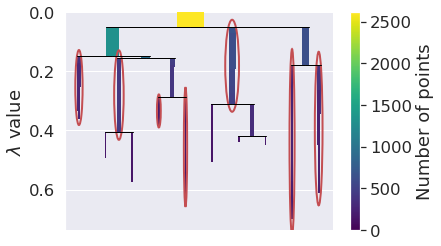

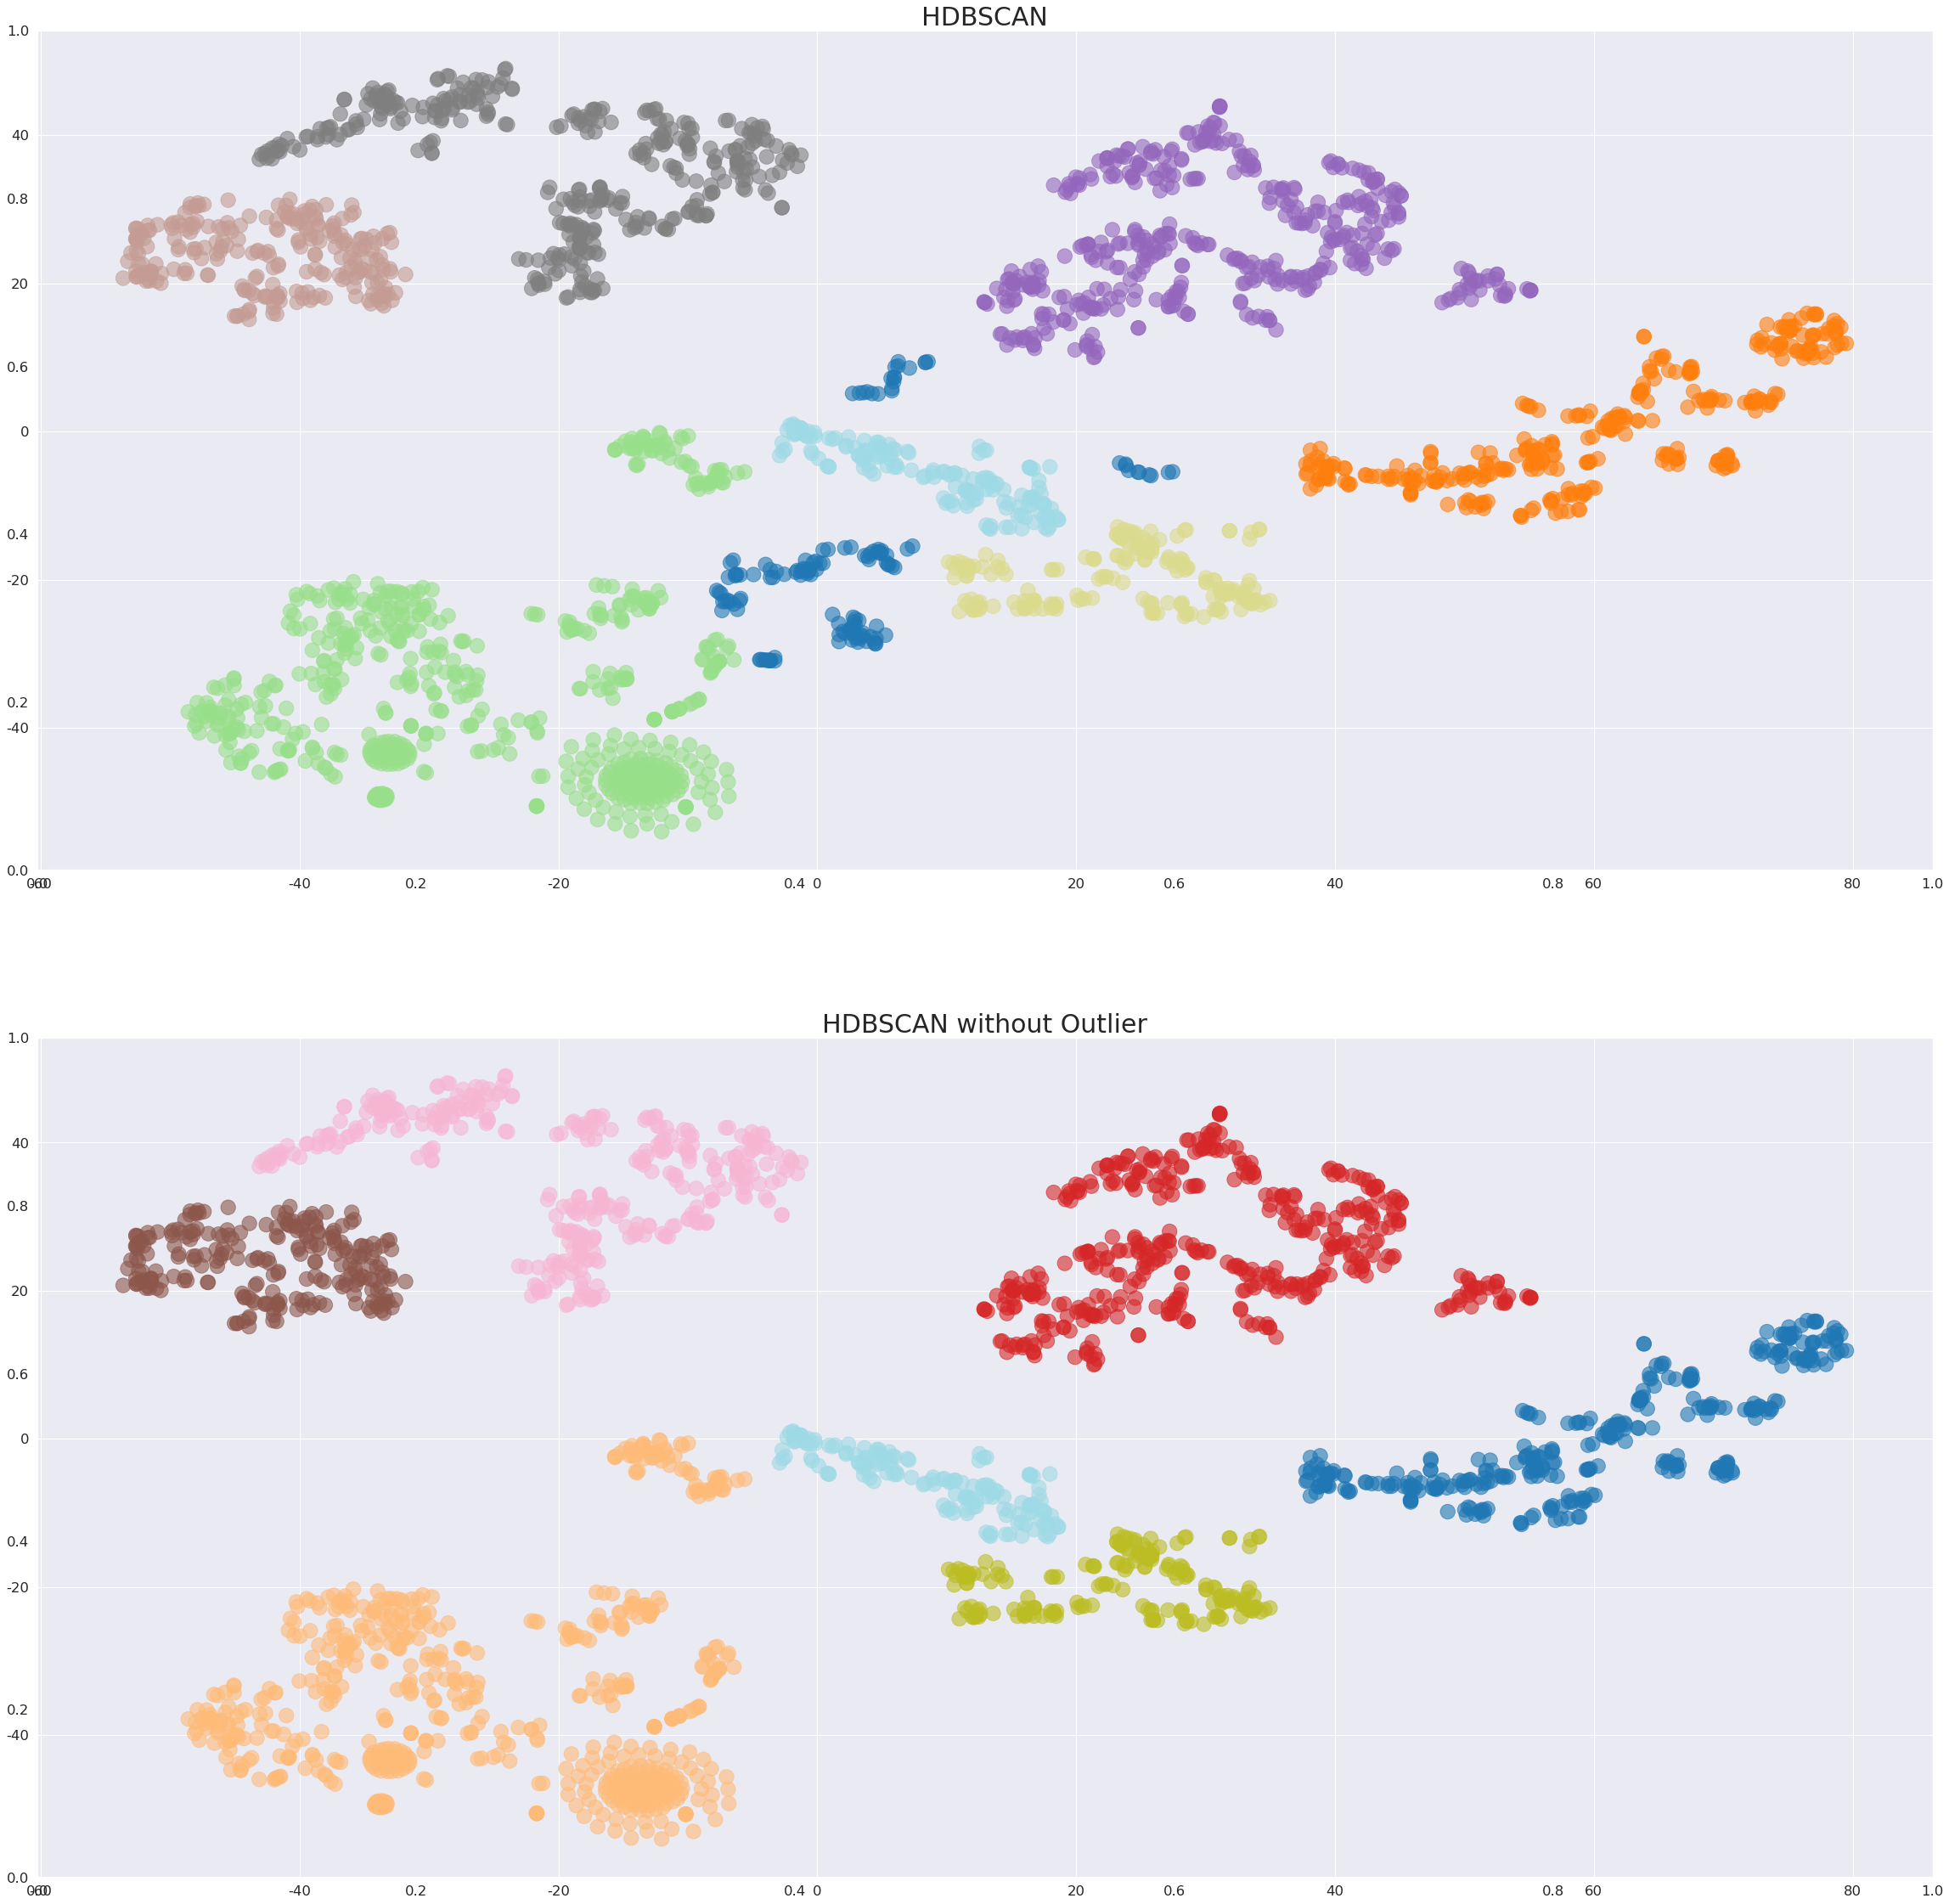

In [14]:
df2 = ccl.hdbscan_clustering(min_cluster_size=150, tsne=True)

### cluster 간의 편차 탐색

Dataframe Describe
         comfort   together        fun    healing      clean           x
count   7.000000   7.000000   7.000000   7.000000   7.000000    7.000000
mean   17.148480  26.456413  19.949395  21.650599  22.921563  353.857143
std     9.383087  25.453284  12.775811  24.804545  33.336534  179.375239
min     9.403550   1.572781   1.562130   0.345118   0.536982  160.000000
25%    10.056642   7.988818  12.702018   2.996649   3.450627  219.000000
50%    10.389106  10.276250  21.356614  15.528212   4.168085  358.000000
75%    24.580909  46.204311  24.903293  31.075783  38.544709  422.500000
max    30.971600  64.959600  41.516400  67.536000  71.755200  676.000000


,comfort,together,fun,healing,clean,x
cluster,,,,,,
-1,12.903731,8.819403,8.983582,3.075373,3.017164,134
0,10.389106,7.810615,13.826536,15.528212,3.172346,358
1,9.403550,1.572781,1.562130,0.345118,0.536982,676
2,21.388009,40.654390,21.948608,20.561884,3.728908,467
3,30.971600,64.959600,41.516400,67.536000,71.755200,250
4,27.773810,51.754233,21.356614,41.589683,71.589418,378
5,10.202660,8.167021,27.857979,2.888298,4.168085,188
6,9.910625,10.276250,11.577500,3.105000,5.500000,160


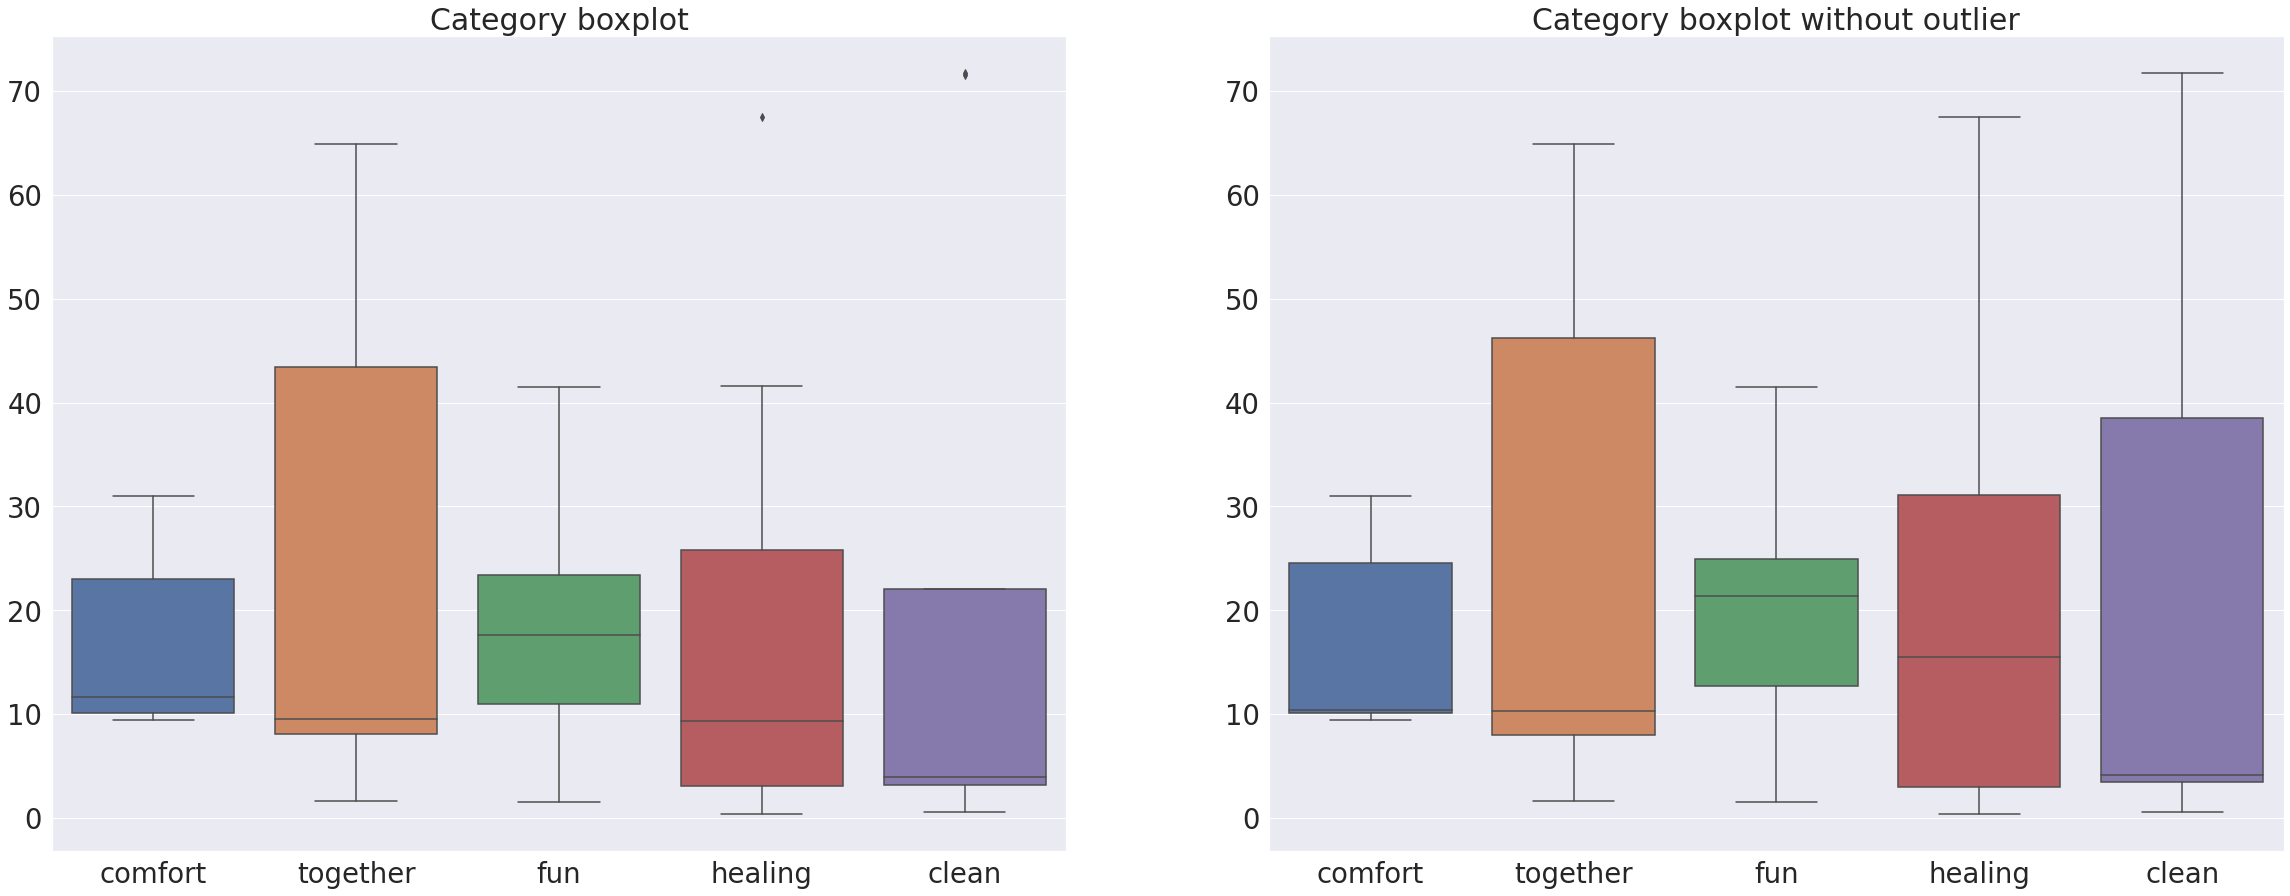

In [15]:
pv2 = ccl.cluster_eda(df2)
pv2

### cluster 별 특성 탐색

In [16]:
df3 = df2[['cluster', 'comfort', 'together', 'fun', 'healing', 'clean']].copy()
df3.set_index('cluster', drop=True, inplace=True)

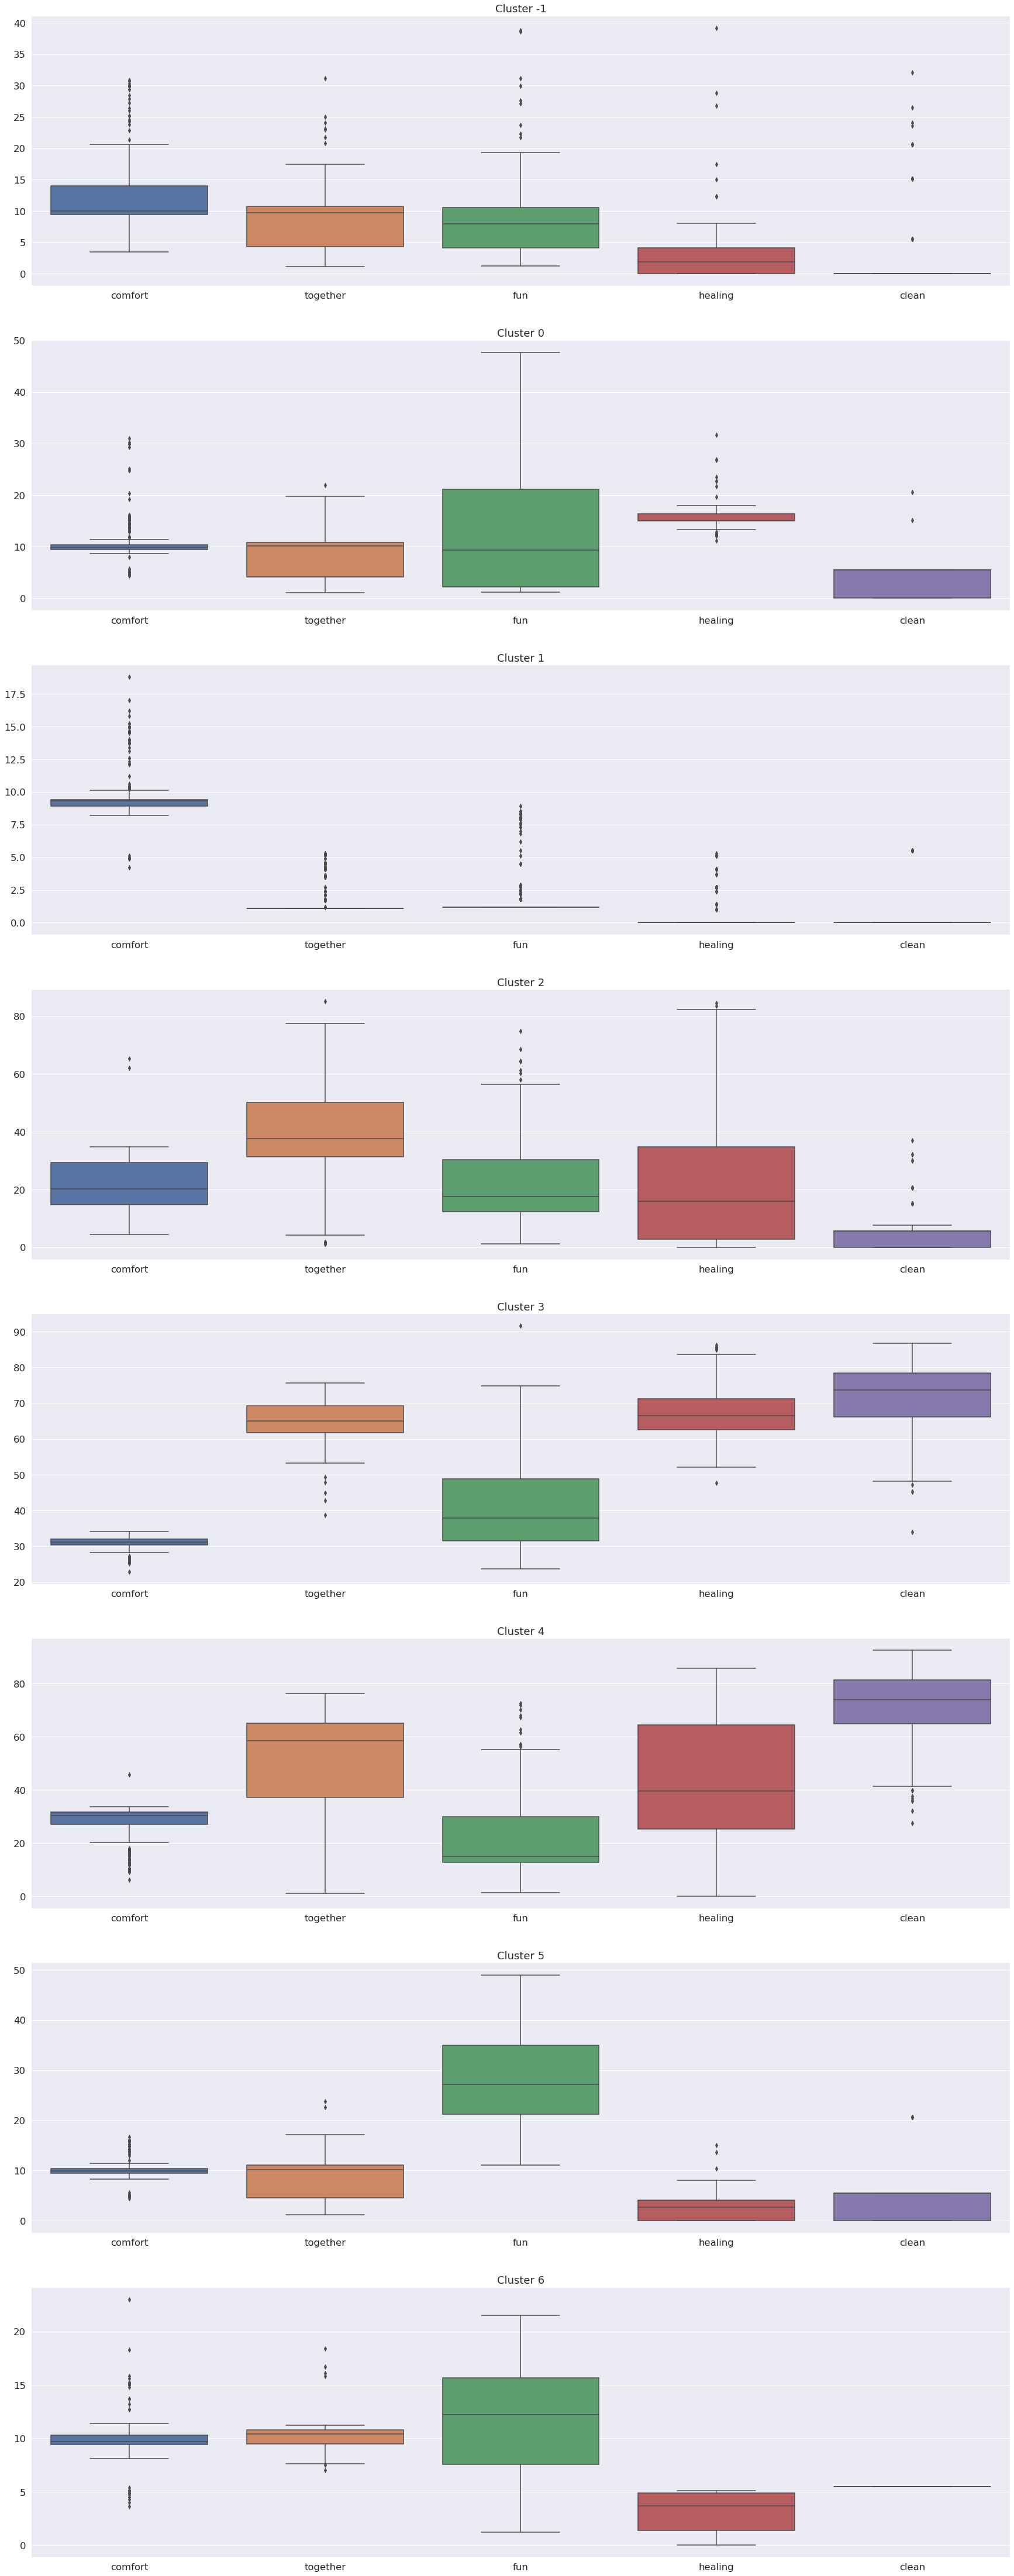

In [17]:
sns.set(font_scale=1.5)
c_ls = np.unique(df3.index).tolist()
fig, ax = plt.subplots(len(c_ls), 1, figsize=(30,80))
                       
for idx, c in enumerate(c_ls):
    t_df = df3[df3.index==c]
    sns.boxplot(data=t_df, ax=ax[idx])
    ax[idx].set_title(f"Cluster {c}")
fig.show()

In [13]:
ccl.export_result(df2)

Report has Saved!
